In [1]:
import db

In [2]:
# db.create_db()

In [3]:
import coin_repository

In [4]:
# from matplotlib import pyplot as plt
import pandas as pd

In [5]:
# Strategy1 : golden cross와 dead cross를 활용 - ma5와 ma20 비교
# import math

(index, origin) = coin_repository.CoinRepository('ETH').get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1


for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma5 <= previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma5 >= previous_ma20:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])

    if tuple[2] > max_close:
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma5 = tuple[0]
    previous_ma20 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

golden cross: (225.14200000000005, 220.66549999999998, 224.71, datetime.date(2017, 7, 24))
dead cross: (206.56200000000004, 209.21999999999997, 193.12, datetime.date(2017, 7, 28))
golden cross: (210.872, 207.16799999999998, 219.95, datetime.date(2017, 8, 2))
dead cross: (327.79200000000003, 334.71700000000004, 334.34, datetime.date(2017, 9, 6))
golden cross: (282.54600000000005, 278.30850000000004, 287.44, datetime.date(2017, 9, 26))
dead cross: (308.73800000000017, 310.1850000000001, 300.19, datetime.date(2017, 10, 21))
golden cross: (299.1980000000002, 298.75150000000014, 294.66, datetime.date(2017, 11, 7))
dead cross: (446.8500000000002, 447.7600000000001, 441.72, datetime.date(2017, 12, 10))
golden cross: (464.16000000000014, 455.4970000000001, 515.14, datetime.date(2017, 12, 11))
dead cross: (1087.048, 1094.0334999999995, 1039.1, datetime.date(2018, 1, 19))
golden cross: (1132.3479999999995, 1129.8664999999996, 1071.13, datetime.date(2018, 1, 30))
dead cross: (1064.8739999999993, 

golden cross: (210.872, 207.16799999999998, 219.95, datetime.date(2017, 8, 2))
dead cross: (327.79200000000003, 334.71700000000004, 334.34, datetime.date(2017, 9, 6))
golden cross: (293.57400000000007, 277.293, 299.15, datetime.date(2017, 9, 28))
dead cross: (308.73800000000017, 310.1850000000001, 300.19, datetime.date(2017, 10, 21))
golden cross: (299.87000000000023, 298.8005000000001, 309.07, datetime.date(2017, 11, 8))
dead cross: (446.8500000000002, 447.7600000000001, 441.72, datetime.date(2017, 12, 10))
golden cross: (464.16000000000014, 455.4970000000001, 515.14, datetime.date(2017, 12, 11))
dead cross: (1087.048, 1094.0334999999995, 1039.1, datetime.date(2018, 1, 19))
golden cross: (489.8800000000003, 421.9224999999997, 531.7, datetime.date(2018, 4, 15))
dead cross: (711.3940000000001, 715.8959999999995, 730.55, datetime.date(2018, 5, 14))
MDD: 29.620265537449754%
CAGR: 504.1950359152627%


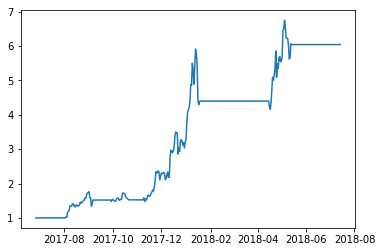

In [6]:
# import math

(index, origin) = coin_repository.CoinRepository('ETH').get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_benefit = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    (ma5_price, ma20_price, close_price, _) = tuple
    if not bought and ma5_price > ma20_price and ma20_price > previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif bought and ma5_price < ma20_price:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (close_price / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (close_price / previous_close))
        else:
            benefits.append(benefits[-1])

            
    if (benefits[-1] > max_benefit):
        max_benefit = benefits[-1]
    
    drawdowns.append(1 - (benefits[-1] / max_benefit))
    
    previous_ma5 = ma5_price
    previous_ma20 = ma20_price
    previous_close = close_price

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

dead cross: (290.8000000000001, 298.684, 274.6, datetime.date(2017, 7, 1))
golden cross: (213.38666666666668, 210.584, 199.66, datetime.date(2017, 7, 14))
dead cross: (193.35000000000002, 201.64400000000003, 170.66, datetime.date(2017, 7, 15))
golden cross: (195.0566666666667, 191.09800000000004, 234.39, datetime.date(2017, 7, 18))
dead cross: (219.12333333333345, 221.03200000000007, 206.71, datetime.date(2017, 7, 25))
golden cross: (202.54666666666677, 201.01600000000002, 203.87, datetime.date(2017, 7, 31))
dead cross: (295.9933333333334, 301.488, 289.82, datetime.date(2017, 8, 15))
golden cross: (299.77333333333337, 297.848, 295.59, datetime.date(2017, 8, 18))
dead cross: (298.1633333333334, 299.64400000000006, 301.43, datetime.date(2017, 8, 20))
golden cross: (306.8300000000001, 303.50800000000004, 321.59, datetime.date(2017, 8, 21))
dead cross: (373.2533333333333, 373.784, 348.98, datetime.date(2017, 9, 2))
golden cross: (325.5866666666666, 323.882, 329.43, datetime.date(2017, 9, 7

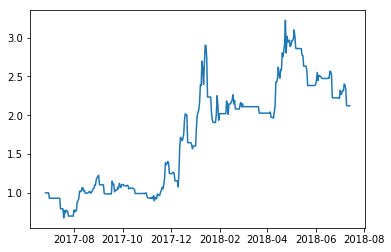

In [7]:
# import math

(index, origin) = coin_repository.CoinRepository('ETH').get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma3'] = close_series.rolling(window=3).mean()
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma3 = -1
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma3'], data['ma5'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma3 <= previous_ma5:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma3 >= previous_ma5:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma3 = tuple[0]
    previous_ma5 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

buy: 2017-06-28
buy: 2017-07-02
buy: 2017-07-04
buy: 2017-07-06
buy: 2017-07-08
buy: 2017-07-12
buy: 2017-07-17
buy: 2017-07-18
buy: 2017-07-20
buy: 2017-07-22
buy: 2017-07-29
buy: 2017-07-31
buy: 2017-08-01
buy: 2017-08-03
buy: 2017-08-05
buy: 2017-08-07
buy: 2017-08-08
buy: 2017-08-09
buy: 2017-08-11
buy: 2017-08-12
buy: 2017-08-16
buy: 2017-08-18
buy: 2017-08-21
buy: 2017-08-24
buy: 2017-08-25
buy: 2017-08-27
buy: 2017-08-29
buy: 2017-08-30
buy: 2017-09-01
buy: 2017-09-12
buy: 2017-09-15
buy: 2017-09-18
buy: 2017-09-23
buy: 2017-09-25
buy: 2017-09-27
buy: 2017-09-30
buy: 2017-10-04
buy: 2017-10-05
buy: 2017-10-06
buy: 2017-10-12
buy: 2017-10-13
buy: 2017-10-16
buy: 2017-10-24
buy: 2017-10-29
buy: 2017-10-31
buy: 2017-11-03
buy: 2017-11-06
buy: 2017-11-07
buy: 2017-11-08
buy: 2017-11-09
buy: 2017-11-11
buy: 2017-11-13
buy: 2017-11-14
buy: 2017-11-18
buy: 2017-11-19
buy: 2017-11-20
buy: 2017-11-22
buy: 2017-11-23
buy: 2017-11-24
buy: 2017-11-27
buy: 2017-11-29
buy: 2017-12-03
buy: 201

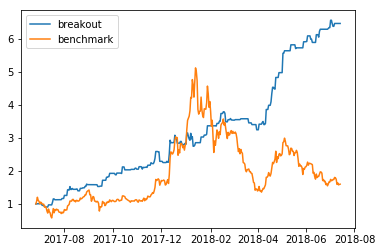

In [8]:
import math
(index, origin) = coin_repository.CoinRepository('ETH').get_data_as_lists()
previous_gap = -1
benefits = []
drawdowns = []
max_benefit = -1

for row in zip(origin['open'], origin['close'], origin['low'], origin['high'], index):
    open_price, close_price, low_price, high_price, date = row
    if previous_gap == -1:
        benefits.append(1)
    else:
        target_price = open_price + previous_gap
        if high_price >= target_price:
            print(f"buy: {date}")
            previous_benefit = benefits[-1]
            benefits.append(previous_benefit * (close_price / target_price))
        else:
            previous_benefit = benefits[-1]
            benefits.append(previous_benefit)
        
    previous_gap = (high_price - low_price) / 2
    if (benefits[-1] > max_benefit):
        max_benefit = benefits[-1]
    
    drawdowns.append(1 - (benefits[-1] / max_benefit))

data_frame = pd.DataFrame({
    'breakout': benefits,
    'benchmark': pd.Series(origin['close'], index) / origin['close'][0]
}, index)
data_frame.plot()

# series2 = pd.Series(drawdowns, index)
# series2.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

benchmark_drawdowns = []
max_benchmark = -1
for row in data_frame['benchmark']:
    if row > max_benchmark:
        max_benchmark = row
    benchmark_drawdowns.append(1 - (row / max_benchmark)) 

print(f"MDD: {max(benchmark_drawdowns) * 100}%")
print(f"benchmark CAGR: {(data_frame['benchmark'][-1] - 1) * 100}%")


MDD: 73.48290628893885%
CAGR: 0%


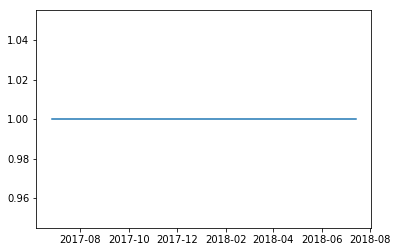

In [10]:
import math

(index, origin) = coin_repository.CoinRepository('ETH').get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=5).mean()
data['close'] = close_series.rolling(window=5).mean()

previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma5 <= previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma5 >= previous_ma20:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma5 = tuple[0]
    previous_ma20 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")